In [1]:
%cd /content/drive/MyDrive
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


/content/drive/MyDrive


In [2]:
data = pd.read_csv("labeled_twcs.csv")
# View the first few rows of the dataset
data.head()

<ipython-input-2-3d3f628d4e12>:1: DtypeWarning: Columns (1,2,3,4,5,6,8) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("labeled_twcs.csv")


,Unnamed: 0,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id,label
0,0,1,sprintcare,False,Tue Oct 31 22:10:47 +0000 2017,@115712 I understand. I would like to assist y...,2,3.0,NEGATIVE
1,1,2,115712,True,Tue Oct 31 22:11:45 +0000 2017,@sprintcare and how do you propose we do that,NaN,1.0,POSITIVE
2,2,3,115712,True,Tue Oct 31 22:08:27 +0000 2017,@sprintcare I have sent several private messag...,1,4.0,NEGATIVE
3,3,4,sprintcare,False,Tue Oct 31 21:54:49 +0000 2017,@115712 Please send us a Private Message so th...,3,5.0,NEGATIVE
4,4,5,115712,True,Tue Oct 31 21:49:35 +0000 2017,@sprintcare I did.,4,6.0,POSITIVE


In [6]:
# View the data types of each column
data= data.drop(columns="Unnamed: 0")
print(data.dtypes)

tweet_id                    object
author_id                   object
inbound                     object
created_at                  object
text                        object
response_tweet_id           object
in_response_to_tweet_id    float64
label                       object
dtype: object


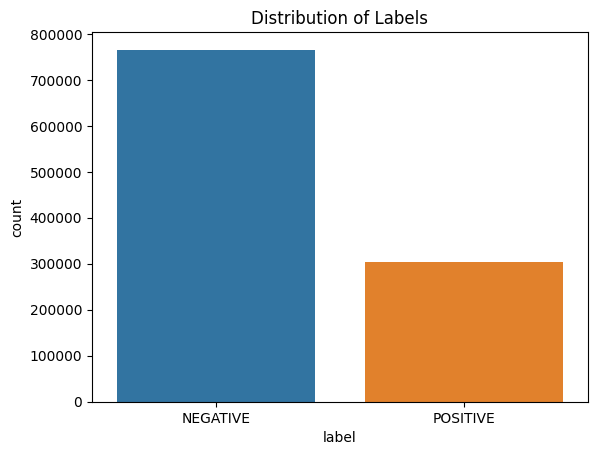

In [10]:
# View the distribution of labels in the dataset
sns.countplot(x='label', data=data)
plt.title('Distribution of Labels')
plt.show()

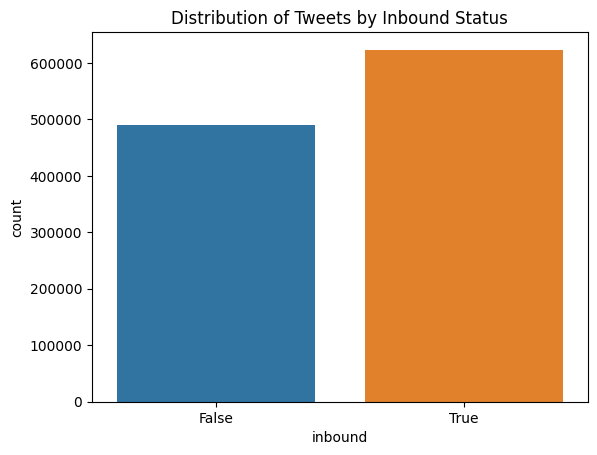

In [17]:
# View the distribution of tweets by inbound status

def inbound_val(x):
  if x in ["True","False"]: return x
  elif x in ["True ", "False "]: return x[:-1]
  elif x=="POSITIVE": return "True"
  elif x=="NEGATIVE": return "False"
  else: "NEGATIVE"
data["inbound"] = data["inbound"].apply(lambda x: inbound_val(x))

sns.countplot(x='inbound', data=data)
plt.title('Distribution of Tweets by Inbound Status')
plt.show()

<ipython-input-4-82d748b9646a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['created_at'] = pd.to_datetime(df['created_at'])
<ipython-input-4-82d748b9646a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hour'] = df['created_at'].dt.hour


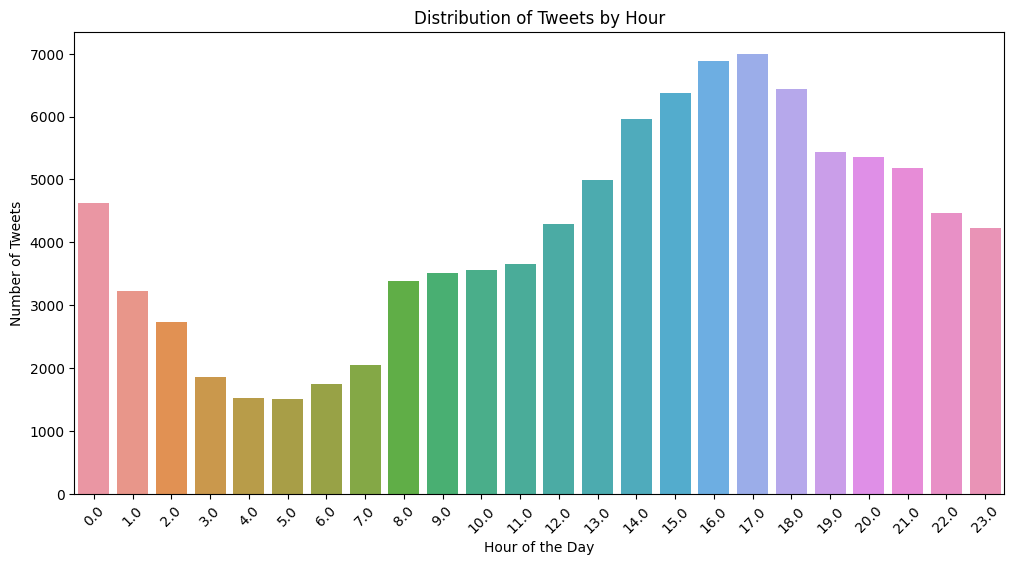

In [4]:
# View the distribution of tweets by time
df = data.iloc[:100000]
df['created_at'] = pd.to_datetime(df['created_at'])
df['hour'] = df['created_at'].dt.hour
plt.figure(figsize=(12, 6))
sns.countplot(x='hour', data=df)
plt.title('Distribution of Tweets by Hour')
plt.xlabel('Hour of the Day')
plt.xticks(rotation=45)
plt.ylabel('Number of Tweets')
plt.show()

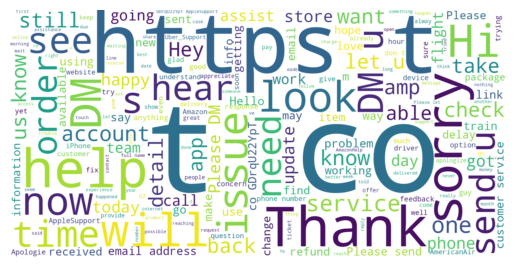

In [6]:
# View the word cloud of the most frequent words in the tweets
from wordcloud import WordCloud
text = ' '.join([str(text) for text in df['text'].tolist()])
wordcloud = WordCloud(width=2000, height=1000, background_color='white').generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Bonus: Sentiments Over Time
I've taken small sample data of 500K rows to draw the sentiments over time. It's Oct 2017 to the end of 2017. We can also take larger timeframe to observe the patterns

In [38]:
# Filter for tweets created 
df = data.iloc[:500000]
df['created_at'] = pd.to_datetime(df['created_at'])

df = df[(df['created_at'].dt.year >= 2017) & (df['created_at'].dt.month >= 10)]

# Group the dataset by quarter and label
df_grouped = df.groupby([pd.Grouper(key='created_at', freq='W'), 'label']).size().reset_index(name='count')

# Pivot the dataset to wide format
df_pivot = df_grouped.pivot(index='created_at', columns='label', values='count').reset_index()

# Set the date column as the index
df_pivot.set_index('created_at', inplace=True)


<ipython-input-38-be0e4a349fe2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['created_at'] = pd.to_datetime(df['created_at'])


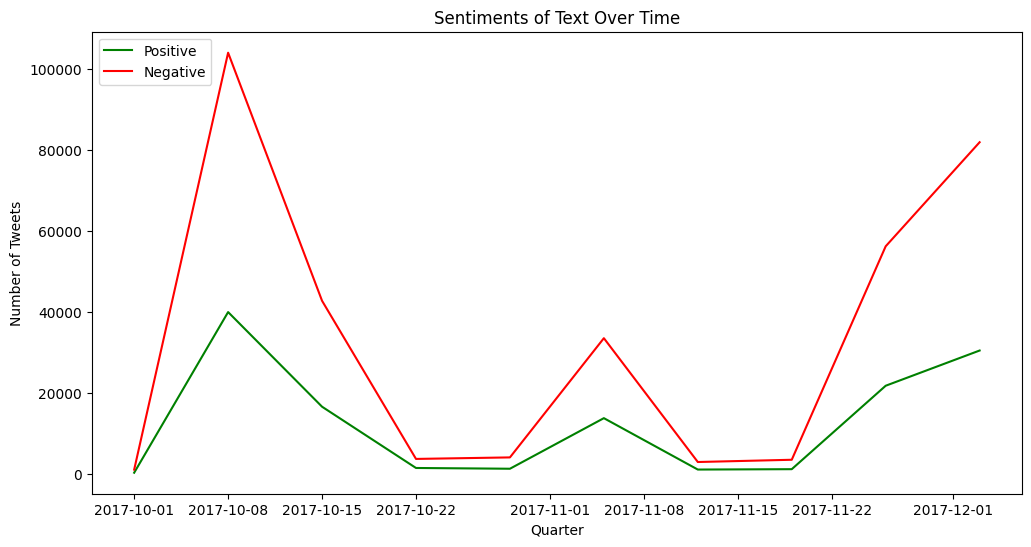

In [39]:
# Create a line chart to visualize the trend of positive, negative, and neutral sentiments over time
plt.figure(figsize=(12, 6))
plt.plot(df_pivot.index, df_pivot['POSITIVE'], color='green', label='Positive')
plt.plot(df_pivot.index, df_pivot['NEGATIVE'], color='red', label='Negative')
plt.legend(loc='upper left')
plt.title('Sentiments of Text Over Time')
plt.xlabel('Quarter')
plt.ylabel('Number of Tweets')
plt.show()


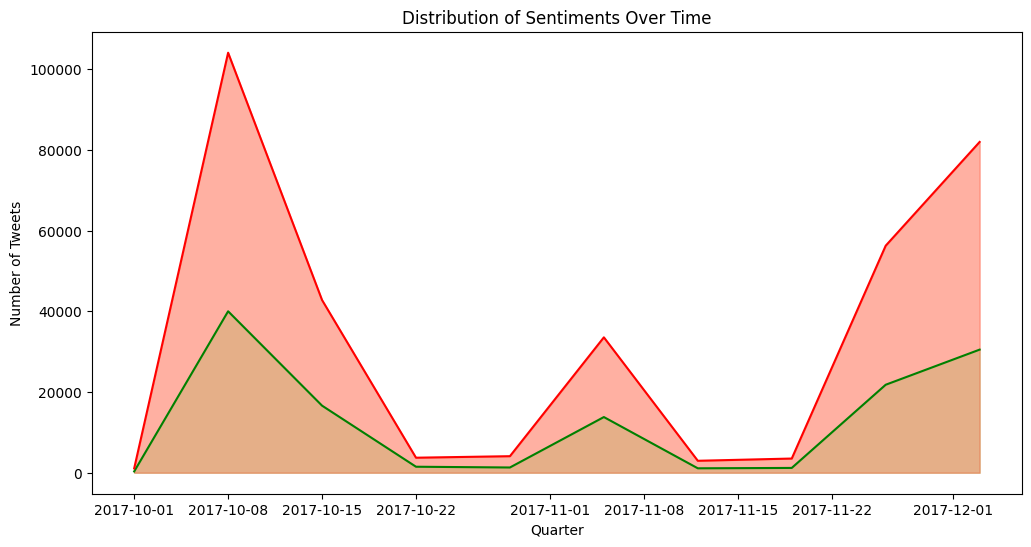

In [40]:
# Create a stacked area chart to visualize the distribution of sentiments over time
plt.figure(figsize=(12, 6))
sns.set_palette('pastel')
plt.plot(df_pivot.index, df_pivot['POSITIVE'], color='green')
plt.plot(df_pivot.index, df_pivot['NEGATIVE'], color='red')
plt.fill_between(df_pivot.index, df_pivot['POSITIVE'], color='palegreen', alpha=0.5)
plt.fill_between(df_pivot.index, df_pivot['NEGATIVE'], color='tomato', alpha=0.5)
plt.title('Distribution of Sentiments Over Time')
plt.xlabel('Quarter')
plt.ylabel('Number of Tweets')
plt.show()